In [1]:
import pandas as pd
df = pd.read_csv("mirror_publications_etherscan.csv")
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_nft,week_google_searches_crypto,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,26,100,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,26,100,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,26,100,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,26,100,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0


In [2]:
# Calcoliamo i terzili per dividere i dati in 3 classi bilanciate
terzili = df["Success"].quantile([1/3, 2/3]).values

# Creiamo la colonna "SuccessClass3" in base ai terzili
df["SuccessClass3"] = pd.cut(df["Success"], bins=[-float("inf"), terzili[0], terzili[1], float("inf")], labels=[0, 1, 2])

# Calcoliamo i quartili per dividere i dati in 4 classi bilanciate
quartili = df["Success"].quantile([1/4, 2/4, 3/4]).values

# Creiamo la colonna "SuccessClass4" in base ai quartili
df["SuccessClass4"] = pd.cut(df["Success"], bins=[-float("inf"), quartili[0], quartili[1], quartili[2], float("inf")], labels=[0, 1, 2, 3])

# Verifica delle distribuzioni
class_counts_3 = df["SuccessClass3"].value_counts()
class_counts_4 = df["SuccessClass4"].value_counts()

class_counts_3, class_counts_4

(SuccessClass3
 0    11745
 2     8736
 1     6394
 Name: count, dtype: int64,
 SuccessClass4
 0    8624
 3    6688
 2    5881
 1    5682
 Name: count, dtype: int64)

In [5]:
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number,SuccessClass3,SuccessClass4
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0,2,3
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0,2,3
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0,0,0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0,2,3
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0,0,1
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0,1,2
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0,0,0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0,1,1


<h1 style="color:red;">Gradient boosting - Binaria</h1>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
Report di classificazione
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2665
           1       0.70      0.76      0.73      2710

    accuracy                           0.72      5375
   macro avg       0.72      0.72      0.72      5375
weighted avg       0.72      0.72      0.72      5375

Confusion matrix:


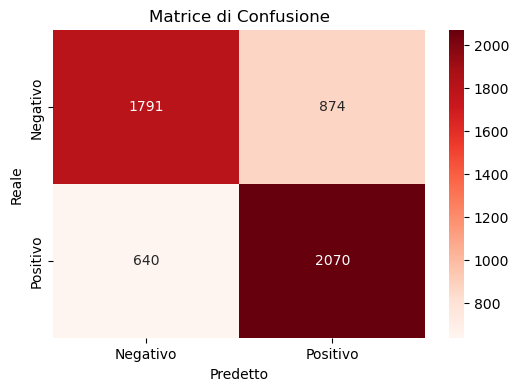

                    Feature  Importance
0                 timestamp    0.154905
42         days_since_epoch    0.152453
32               paragraphs    0.076683
16            verbs_density    0.043680
29                    words    0.040690
18            nouns_density    0.035204
22      characters_per_word    0.034754
6               words_title    0.030034
24       words_per_sentence    0.028714
30                wordtypes    0.027181
8      normalized_tfidf_sum    0.025427
25  sentences_per_paragraph    0.024156
3                       day    0.022884
21          GunningFogIndex    0.022095
26         type_token_ratio    0.022058
17       adjectives_density    0.020505
27               characters    0.020085
23            syll_per_word    0.020070
4    cleaned_text_sentiment    0.019608
19                  Kincaid    0.018046


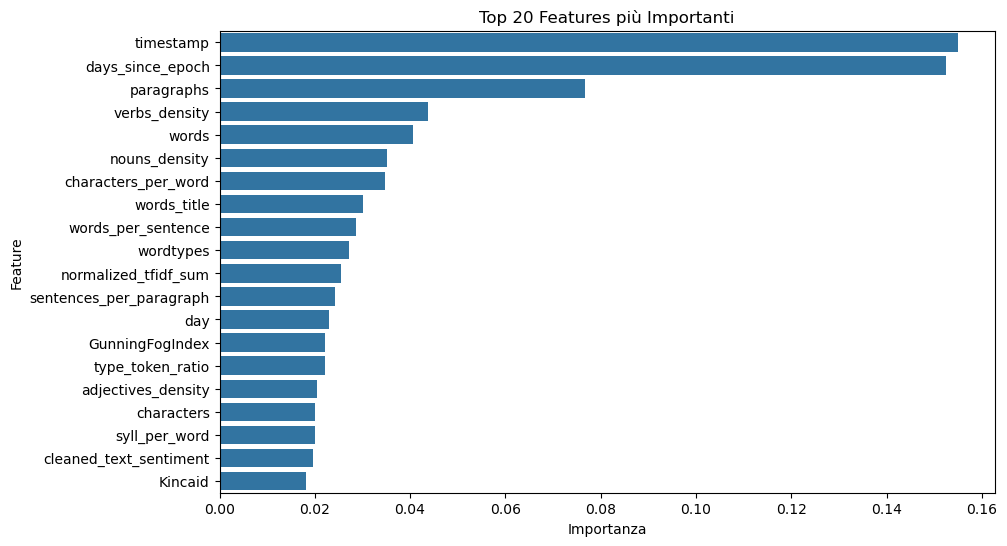

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title(f"Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2665
           1       0.87      0.90      0.89      2710

    accuracy                           0.88      5375
   macro avg       0.88      0.88      0.88      5375
weighted avg       0.88      0.88      0.88      5375

Confusion matrix:


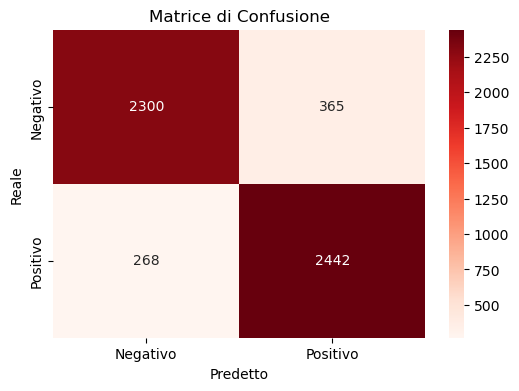

                            Feature  Importance
13                 authorTotalSales    0.369580
14               authorTotalRevenue    0.349376
12                  authorPostCount    0.193279
43  optimism_active_addresses_total    0.009348
8                       max_eth_usd    0.005247
9                       min_eth_usd    0.004463
31                         vol_usdc    0.003362
2                       max_btc_usd    0.003108
39      daily_transactions_optimism    0.003086
19                     vol_optimism    0.002406
25                       vol_tether    0.002373
29                     max_usdc_usd    0.002369
22                  open_tether_usd    0.002230
44         week_google_searches_nft    0.002116
4                           vol_btc    0.002101
37                          vol_dai    0.002020
35                      max_dai_usd    0.001995
10                          vol_eth    0.001911
7                      open_eth_usd    0.001902
42      eth_active_addresses_sender    0

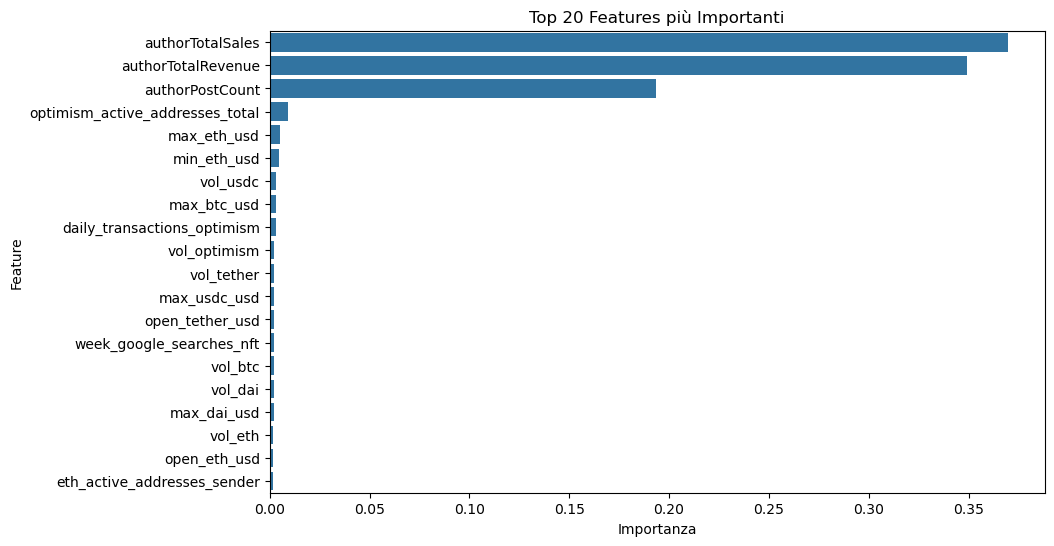

In [15]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title(f"Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2665
           1       0.87      0.90      0.89      2710

    accuracy                           0.88      5375
   macro avg       0.88      0.88      0.88      5375
weighted avg       0.88      0.88      0.88      5375

Confusion matrix:


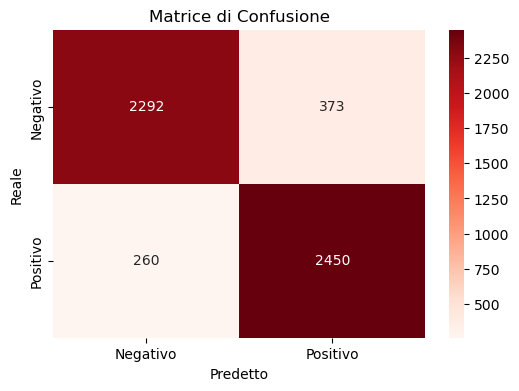

                            Feature  Importance
56                 authorTotalSales    0.354397
57               authorTotalRevenue    0.336318
55                  authorPostCount    0.181942
0                         timestamp    0.009962
22              characters_per_word    0.005139
51                      max_eth_usd    0.004650
86  optimism_active_addresses_total    0.004400
42                 days_since_epoch    0.003941
23                    syll_per_word    0.003807
52                      min_eth_usd    0.003685
20                FleschReadingEase    0.003525
16                    verbs_density    0.003521
45                      max_btc_usd    0.003203
8              normalized_tfidf_sum    0.002490
82      daily_transactions_optimism    0.002479
74                         vol_usdc    0.002282
24               words_per_sentence    0.002276
18                    nouns_density    0.002189
87         week_google_searches_nft    0.002139
4            cleaned_text_sentiment    0

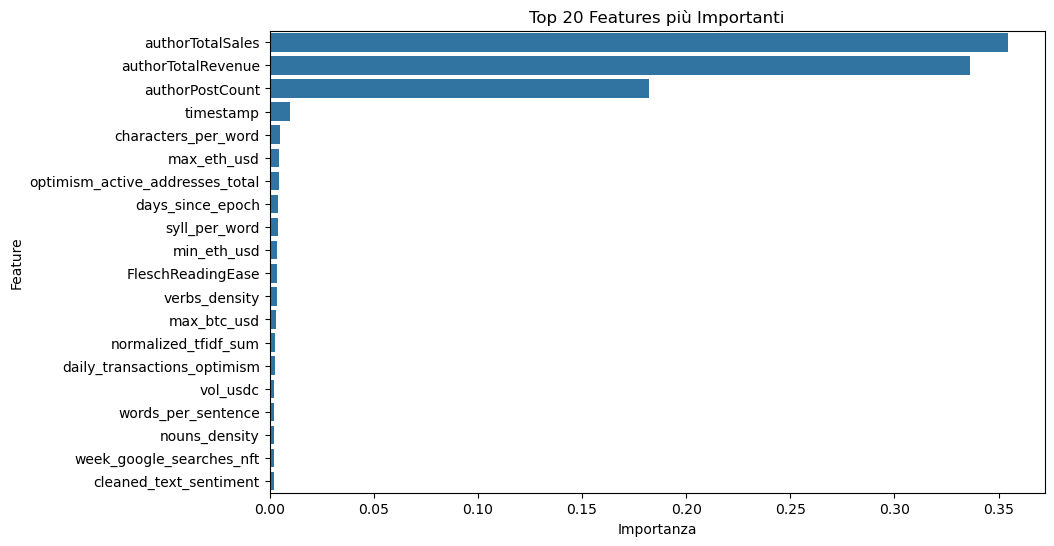

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title(f"Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

<h1 style="color:red;">Gradient boosting - 3 classi</h1>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      2349
           1       0.47      0.09      0.15      1279
           2       0.55      0.71      0.62      1747

    accuracy                           0.58      5375
   macro avg       0.55      0.52      0.48      5375
weighted avg       0.56      0.58      0.54      5375

Confusion matrix:


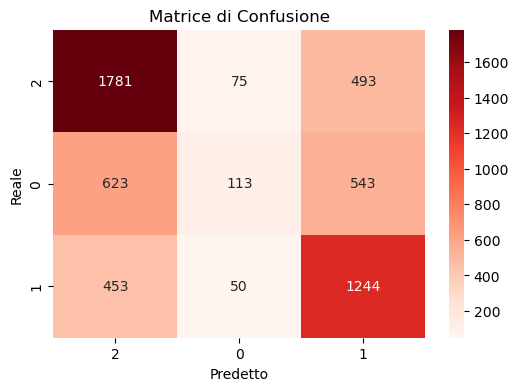

                    Feature  Importance
42         days_since_epoch    0.156398
0                 timestamp    0.155901
32               paragraphs    0.100875
30                wordtypes    0.048120
22      characters_per_word    0.030378
24       words_per_sentence    0.030343
18            nouns_density    0.030121
6               words_title    0.030118
26         type_token_ratio    0.029859
16            verbs_density    0.028772
4    cleaned_text_sentiment    0.022983
27               characters    0.022776
8      normalized_tfidf_sum    0.022713
21          GunningFogIndex    0.021872
31                sentences    0.021211
3                       day    0.020091
2                     month    0.018790
17       adjectives_density    0.018503
25  sentences_per_paragraph    0.018081
19                  Kincaid    0.017552


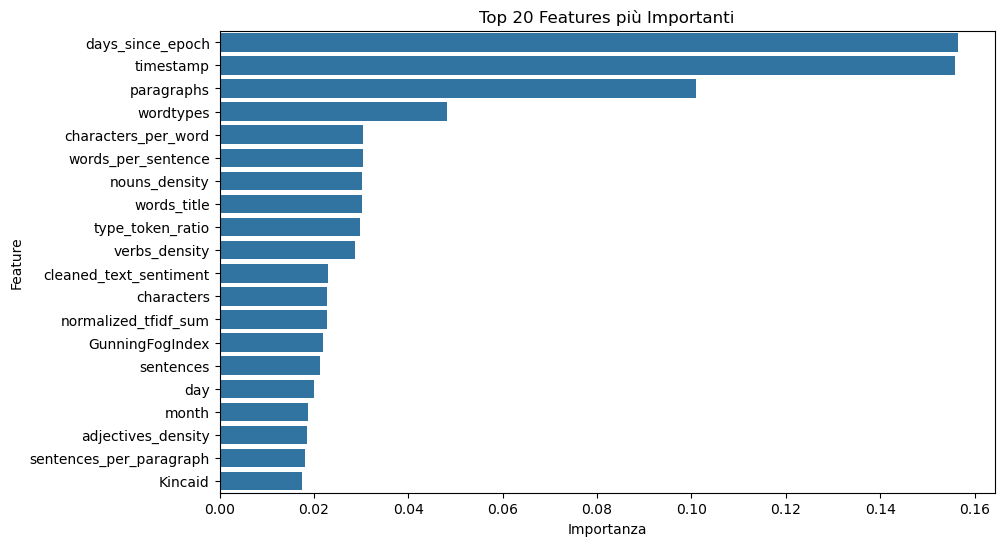

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
class_names = y.unique()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2349
           1       0.65      0.58      0.61      1279
           2       0.81      0.90      0.85      1747

    accuracy                           0.80      5375
   macro avg       0.78      0.77      0.77      5375
weighted avg       0.80      0.80      0.80      5375

Confusion matrix:


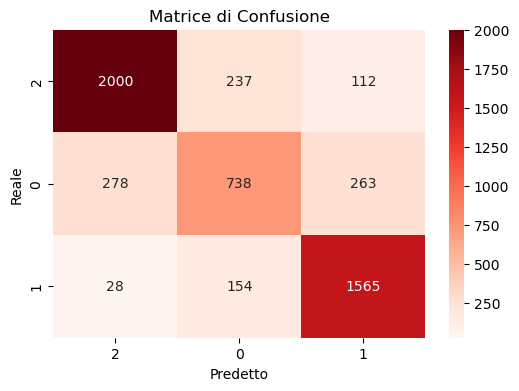

                            Feature  Importance
13                 authorTotalSales    0.354116
14               authorTotalRevenue    0.351018
12                  authorPostCount    0.179330
43  optimism_active_addresses_total    0.013667
31                         vol_usdc    0.004906
44         week_google_searches_nft    0.003987
25                       vol_tether    0.003636
42      eth_active_addresses_sender    0.003605
4                           vol_btc    0.003565
39      daily_transactions_optimism    0.003458
6                      last_eth_usd    0.003326
19                     vol_optimism    0.003219
37                          vol_dai    0.003009
7                      open_eth_usd    0.003002
8                       max_eth_usd    0.002889
10                          vol_eth    0.002686
3                       min_btc_usd    0.002568
0                      last_btc_usd    0.002496
45      week_google_searches_crypto    0.002412
20                    var%_optimism    0

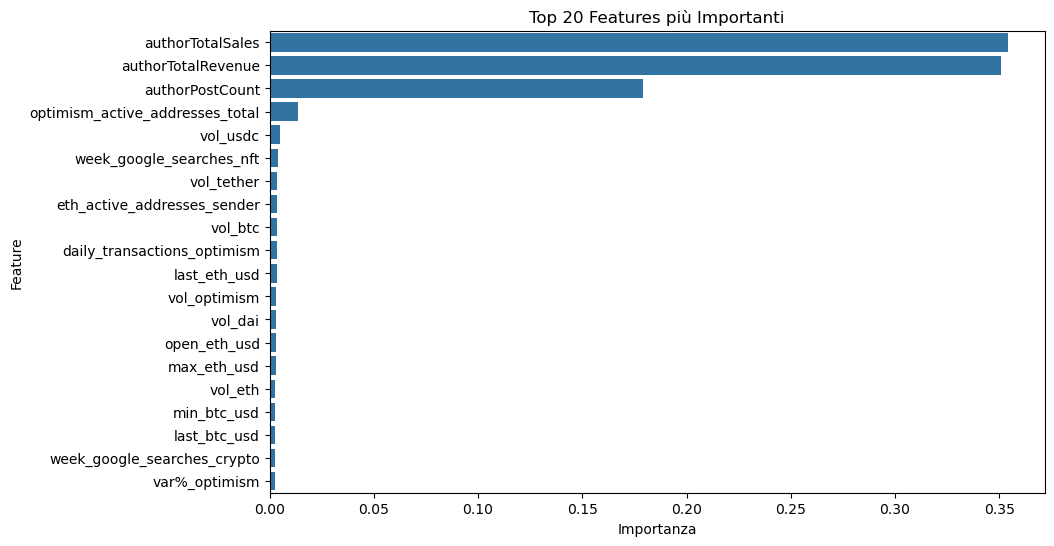

In [24]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
class_names = y.unique()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
Report di classificazione
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2349
           1       0.65      0.59      0.62      1279
           2       0.82      0.89      0.85      1747

    accuracy                           0.80      5375
   macro avg       0.78      0.78      0.78      5375
weighted avg       0.80      0.80      0.80      5375

Confusion matrix:


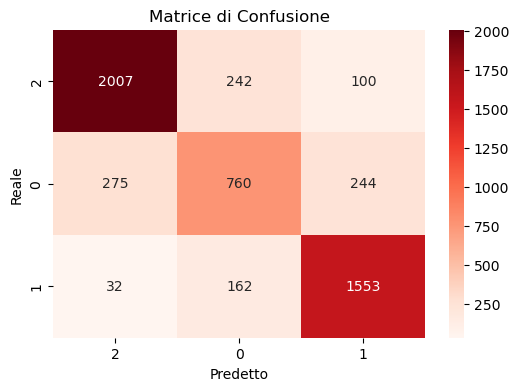

                            Feature  Importance
56                 authorTotalSales    0.304309
57               authorTotalRevenue    0.300706
55                  authorPostCount    0.153200
0                         timestamp    0.015602
22              characters_per_word    0.007270
18                    nouns_density    0.006359
42                 days_since_epoch    0.006102
24               words_per_sentence    0.005874
4            cleaned_text_sentiment    0.005780
8              normalized_tfidf_sum    0.005694
17               adjectives_density    0.005386
26                 type_token_ratio    0.005165
74                         vol_usdc    0.005042
16                    verbs_density    0.004953
20                FleschReadingEase    0.004897
21                  GunningFogIndex    0.004836
86  optimism_active_addresses_total    0.004535
19                          Kincaid    0.004500
23                    syll_per_word    0.004490
32                       paragraphs    0

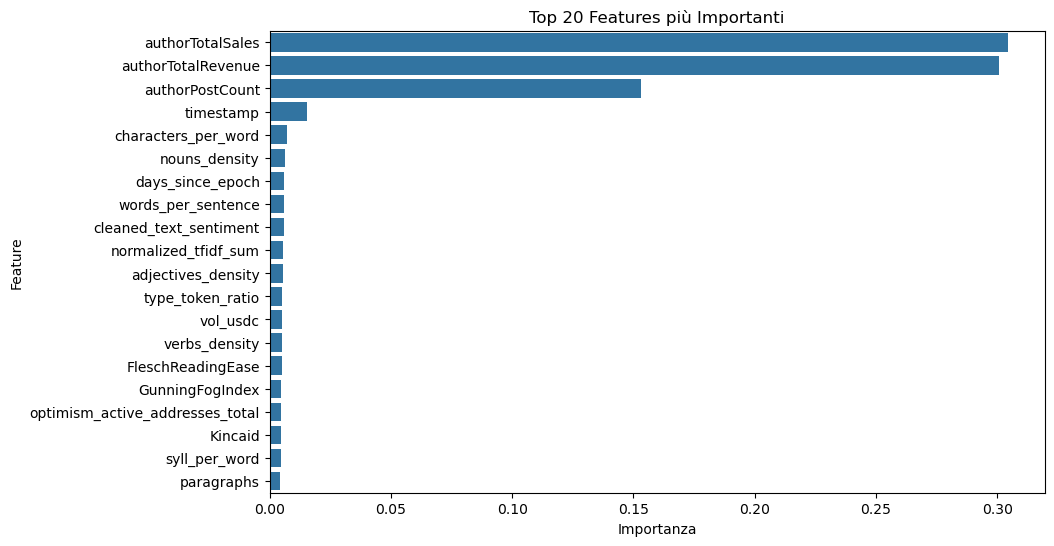

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
class_names = y.unique()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

<h1 style="color:red;">Gradient boosting - 4 classi</h1>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
Report di classificazione
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      1725
           1       0.37      0.21      0.26      1136
           2       0.39      0.31      0.35      1176
           3       0.50      0.64      0.57      1338

    accuracy                           0.49      5375
   macro avg       0.46      0.46      0.45      5375
weighted avg       0.47      0.49      0.47      5375

Confusion matrix:


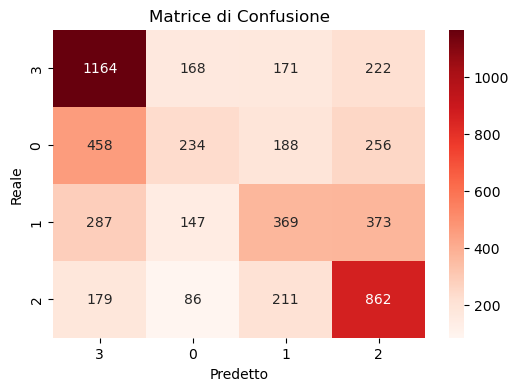

                    Feature  Importance
0                 timestamp    0.124447
42         days_since_epoch    0.109294
32               paragraphs    0.066078
18            nouns_density    0.039888
22      characters_per_word    0.039613
16            verbs_density    0.038239
26         type_token_ratio    0.035490
24       words_per_sentence    0.035384
8      normalized_tfidf_sum    0.034210
17       adjectives_density    0.033596
4    cleaned_text_sentiment    0.031782
3                       day    0.030829
30                wordtypes    0.030246
27               characters    0.025633
21          GunningFogIndex    0.025348
6               words_title    0.024668
25  sentences_per_paragraph    0.023579
20        FleschReadingEase    0.023340
23            syll_per_word    0.023196
19                  Kincaid    0.022174


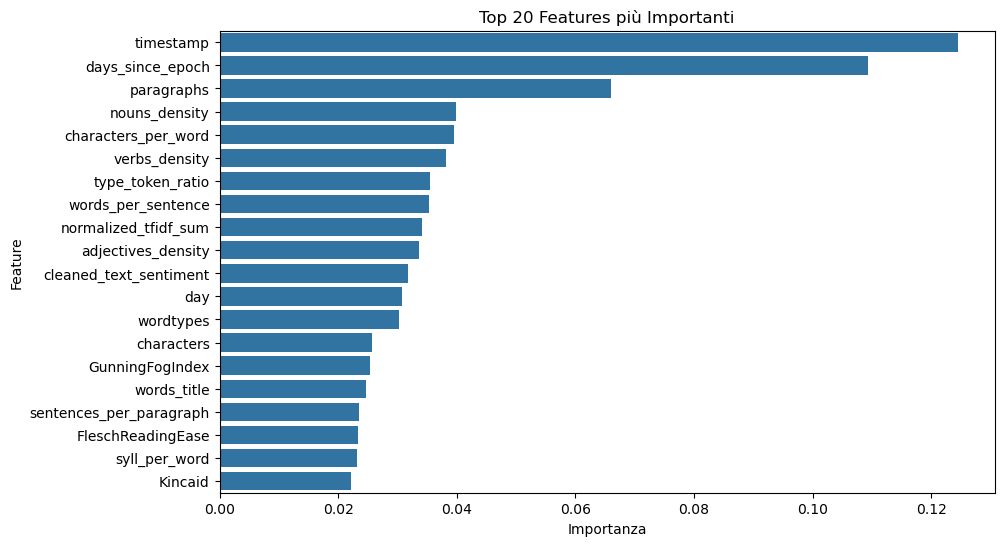

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
class_names = y.unique()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1725
           1       0.65      0.55      0.60      1136
           2       0.63      0.69      0.66      1176
           3       0.79      0.87      0.83      1338

    accuracy                           0.74      5375
   macro avg       0.73      0.73      0.72      5375
weighted avg       0.74      0.74      0.74      5375

Confusion matrix:


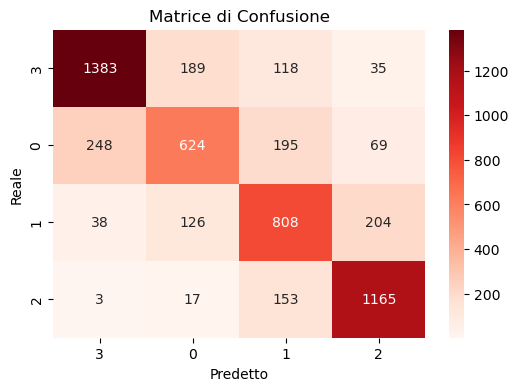

                            Feature  Importance
13                 authorTotalSales    0.363756
14               authorTotalRevenue    0.319179
12                  authorPostCount    0.180495
43  optimism_active_addresses_total    0.014892
39      daily_transactions_optimism    0.005616
0                      last_btc_usd    0.005416
31                         vol_usdc    0.004690
44         week_google_searches_nft    0.004150
19                     vol_optimism    0.004101
42      eth_active_addresses_sender    0.003674
6                      last_eth_usd    0.003645
4                           vol_btc    0.003602
37                          vol_dai    0.003539
41    eth_active_addresses_receiver    0.003513
25                       vol_tether    0.003507
20                    var%_optimism    0.003271
10                          vol_eth    0.003161
17                 max_optimism_usd    0.003132
1                      open_btc_usd    0.003060
2                       max_btc_usd    0

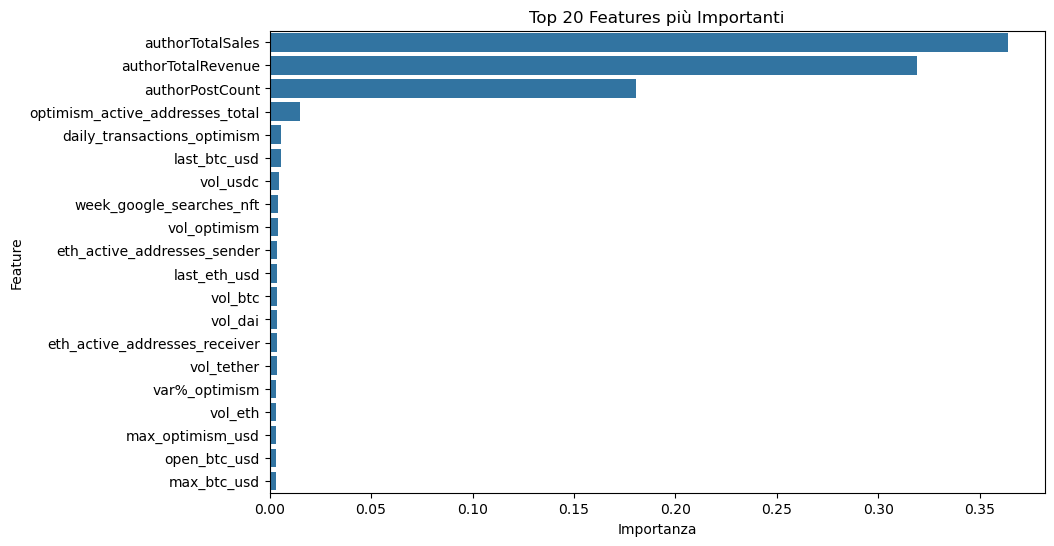

In [33]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
class_names = y.unique()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1725
           1       0.67      0.55      0.60      1136
           2       0.64      0.70      0.67      1176
           3       0.80      0.88      0.84      1338

    accuracy                           0.75      5375
   macro avg       0.73      0.73      0.73      5375
weighted avg       0.74      0.75      0.74      5375

Confusion matrix:


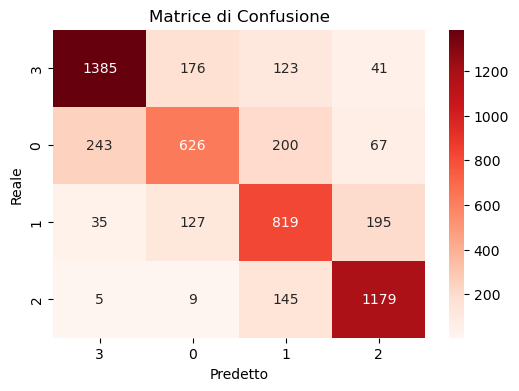

                            Feature  Importance
56                 authorTotalSales    0.337900
57               authorTotalRevenue    0.302749
55                  authorPostCount    0.165932
0                         timestamp    0.016357
18                    nouns_density    0.005190
42                 days_since_epoch    0.004979
24               words_per_sentence    0.004977
86  optimism_active_addresses_total    0.004896
22              characters_per_word    0.004836
43                     last_btc_usd    0.004666
8              normalized_tfidf_sum    0.004550
82      daily_transactions_optimism    0.004122
87         week_google_searches_nft    0.003741
4            cleaned_text_sentiment    0.003635
16                    verbs_density    0.003538
26                 type_token_ratio    0.003516
17               adjectives_density    0.003490
21                  GunningFogIndex    0.003398
74                         vol_usdc    0.003308
23                    syll_per_word    0

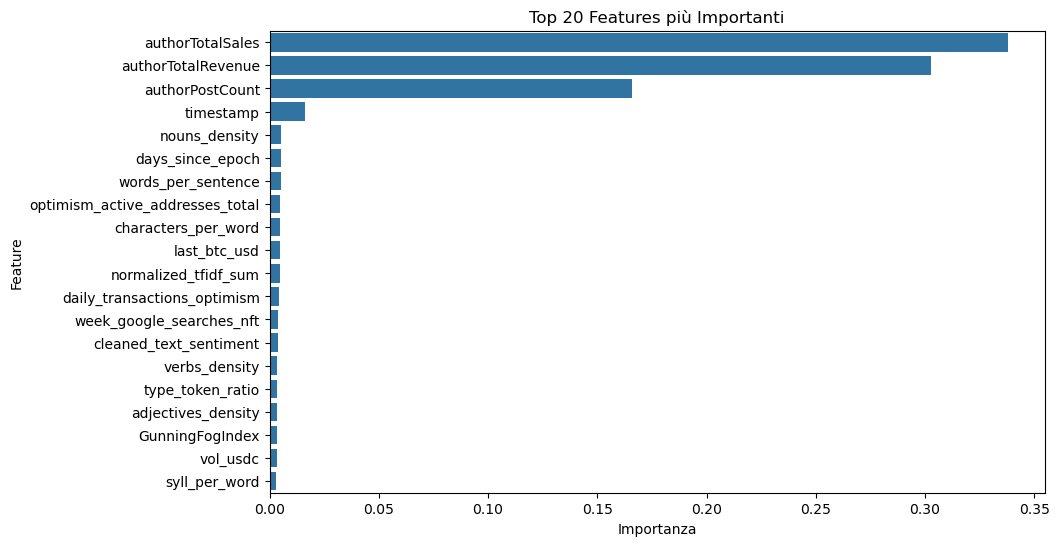

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
class_names = y.unique()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()